<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [9]:
# Instala la biblioteca yfinance, una herramienta para descargar datos financieros históricos y actuales desde Yahoo Finance.
#!pip install yfinance==0.2.38
# Instala la biblioteca pandas, una herramienta esencial para la manipulación y análisis de datos en Python.
#!pip install pandas==2.2.2
# Instala la biblioteca nbformat, que permite la lectura y escritura de notebooks Jupyter en formato JSON.
#!pip install nbformat

!pip install yfinance==0.2.38
!pip install pandas==2.2.2
!pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
'''
# Instala la biblioteca yfinance, una herramienta para descargar datos financieros históricos y actuales desde Yahoo Finance.
!pip install yfinance
# Instala la biblioteca BeautifulSoup (bs4), que se utiliza para analizar y extraer datos de archivos HTML y XML.
!pip install bs4
# Instala la biblioteca nbformat, que permite la lectura y escritura de notebooks Jupyter en formato JSON.
!pip install nbformat

'''
!pip install yfinance
!pip install bs4
!pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
'''
# Importa la biblioteca yfinance como 'yf', que permite descargar datos financieros históricos y actuales desde Yahoo Finance.
import yfinance as yf
# Importa la biblioteca pandas como 'pd', esencial para la manipulación y análisis de datos en estructuras tipo DataFrame.
import pandas as pd
# Importa la biblioteca requests, que facilita el envío de solicitudes HTTP para recuperar datos de la web.
import requests
# Importa BeautifulSoup desde la biblioteca bs4, que se utiliza para analizar y extraer datos de archivos HTML y XML.
from bs4 import BeautifulSoup
# Importa la biblioteca plotly.graph_objects como 'go', que se utiliza para crear gráficos interactivos y visualizaciones de datos.
import plotly.graph_objects as go
# Importa la función make_subplots desde plotly.subplots, que permite crear subgráficos dentro de una sola figura para visualizaciones más complejas.
from plotly.subplots import make_subplots

'''
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [5]:
# Importa la biblioteca warnings, que se utiliza para manejar las advertencias que Python emite durante la ejecución.
import warnings
# Ignora todas las advertencias de categoría FutureWarning. Estas advertencias suelen indicar que un comportamiento de la biblioteca o del código puede cambiar en futuras versiones.
warnings.filterwarnings("ignore", category=FutureWarning)


## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [8]:
def make_graph(stock_data, revenue_data, stock):
    # Crea una figura con dos subgráficos en una columna, compartiendo el eje x. 
    # El primer subgráfico muestra el precio de las acciones históricas y el segundo muestra los ingresos históricos.
    fig = make_subplots(
        rows=2, 
        cols=1, 
        shared_xaxes=True, 
        subplot_titles=("Historical Share Price", "Historical Revenue"), 
        vertical_spacing=0.3
    )
    
    # Filtra los datos de stock_data para incluir solo las fechas hasta el 14 de junio de 2021.
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']    
    # Filtra los datos de revenue_data para incluir solo las fechas hasta el 30 de abril de 2021.
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']    
    # Agrega una traza de gráfico de dispersión para el precio de las acciones al primer subgráfico.
    # Se convierte la columna 'Date' a formato datetime y 'Close' a tipo float.
    fig.add_trace(
        go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), 
        row=1, 
        col=1
    )    
    # Agrega una traza de gráfico de dispersión para los ingresos al segundo subgráfico.
    # Se convierte la columna 'Date' a formato datetime y 'Revenue' a tipo float.
    fig.add_trace(
        go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), 
        row=2, 
        col=1
    )    
    # Actualiza el eje x del primer subgráfico para incluir un título.
    fig.update_xaxes(title_text="Date", row=1, col=1)    
    # Actualiza el eje x del segundo subgráfico para incluir un título.
    fig.update_xaxes(title_text="Date", row=2, col=1)    
    # Actualiza el eje y del primer subgráfico para incluir un título.
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)    
    # Actualiza el eje y del segundo subgráfico para incluir un título.
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)    
    # Actualiza el diseño de la figura, ocultando la leyenda, estableciendo la altura de la figura, 
    # configurando el título y mostrando el control deslizante del rango x.
    fig.update_layout(
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=True
    )    
    # Muestra la figura interactiva.
    fig.show()


Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


# Ejercicio Final

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.

Usando la función "Ticker", ingrese el símbolo de cotización de la acción de la que queremos extraer datos para crear un objeto de cotización. La acción es Tesla y su símbolo de cotización es "TSLA".

## Pregunta 1: Utilice yfinance para extraer datos bursátiles

In [10]:
! pip install yfinance
import yfinance as yf
# Descargar los datos de Tesla
tesla = yf.Ticker("TSLA")

# Obtener el historial de datos
tesla_hist = tesla.history(period="5y")  # Datos de los últimos 5 años
print(tesla_hist.head())

                                Open       High        Low      Close  \
Date                                                                    
2019-09-09 00:00:00-04:00  15.333333  15.584000  15.282000  15.452667   
2019-09-10 00:00:00-04:00  15.386667  15.702667  15.262667  15.702667   
2019-09-11 00:00:00-04:00  15.825333  16.544666  15.733333  16.473333   
2019-09-12 00:00:00-04:00  16.513332  16.900000  16.293333  16.391333   
2019-09-13 00:00:00-04:00  16.464001  16.563334  16.324667  16.346666   

                              Volume  Dividends  Stock Splits  
Date                                                           
2019-09-09 00:00:00-04:00   72040500        0.0           0.0  
2019-09-10 00:00:00-04:00   73255500        0.0           0.0  
2019-09-11 00:00:00-04:00  150642000        0.0           0.0  
2019-09-12 00:00:00-04:00  128718000        0.0           0.0  
2019-09-13 00:00:00-04:00   79696500        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.

Usando el objeto ticker y la función "historial", extraiga información bursátil y guárdela en un marco de datos llamado "tesla_data". Establezca el parámetro `period` en ` "max" ` para que obtengamos información durante la cantidad máxima de tiempo.


In [12]:
import yfinance as yf

# Crear el objeto de cotización para Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extraer el historial bursátil con el periodo máximo
tesla_data = tesla.history(period="max")

# Mostrar las primeras filas del DataFrame para verificar la información
tesla_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.

**Restablezca el índice** usando la función `reset_index(inplace=True)` en el marco de datos tesla_data y muestre las primeras cinco filas del marco de datos `tesla_data` usando la función `head`. Tome una captura de pantalla de los resultados y el código desde el comienzo de la Pregunta 1 hasta los resultados a continuación.

In [14]:
import yfinance as yf

# Crear el objeto de cotización para Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extraer el historial bursátil desde un periodo más reciente (ejemplo: 10 años)
tesla_data = tesla.history(period="10y")

# Reiniciar el índice en el DataFrame
tesla_data.reset_index(inplace=True)

# Mostrar las primeras cinco filas del DataFrame
print(tesla_data.head())


                       Date       Open       High        Low      Close  \
0 2014-09-08 00:00:00-04:00  18.507999  18.992001  18.501333  18.807333   
1 2014-09-09 00:00:00-04:00  18.865999  19.032667  18.466667  18.565332   
2 2014-09-10 00:00:00-04:00  18.633333  18.760668  18.243999  18.740000   
3 2014-09-11 00:00:00-04:00  18.697332  18.986000  18.575333  18.687332   
4 2014-09-12 00:00:00-04:00  18.700001  18.826000  18.466667  18.613333   

     Volume  Dividends  Stock Splits  
0  82524000        0.0           0.0  
1  68382000        0.0           0.0  
2  56719500        0.0           0.0  
3  56491500        0.0           0.0  
4  49869000        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [15]:
import requests
from bs4 import BeautifulSoup

# URL de Tesla (cambiar la URL a la página adecuada)
tesla_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tesla_page = requests.get(tesla_url)

# Analizar el contenido
soup = BeautifulSoup(tesla_page.content, 'html.parser')

# Extraer la tabla de ingresos
tables = soup.find_all('table')
for table in tables:
    print(table)


<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2021</td>
<td style="text-align:center">$53,823</td>
</tr>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$31,536</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$24,578</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$21,461</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$11,759</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$7,000</td>
</tr>
<tr>
<td style="text-align:center">2015</td>
<td style="text-align:center">$4,046</td>
</tr>
<tr>
<td style="text-align:center">2014</td>
<td style="text-align:center">$3,198</td>
</tr>
<tr>
<td style="text-align:center">2013</td

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .

Analice los datos html usando `beautiful_soup` usando el analizador, es decir, `html5lib` o `html.parser`. Asegúrese de utilizar `html_data` con el parámetro de contenido como sigue `html_data.content`.

In [16]:
import requests
from bs4 import BeautifulSoup

# URL de Tesla (cambiar la URL a la página adecuada)
tesla_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Hacer una solicitud a la página web
html_data = requests.get(tesla_url)

# Analizar el contenido de la página web usando html.parser
soup = BeautifulSoup(html_data.content, 'html.parser')

# Mostrar el análisis HTML (por ejemplo, las primeras 500 líneas)
print(soup.prettify()[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.

Usando `BeautifulSoup` o la función `read_html`, extraiga la tabla con `Tesla Revenue` y guárdela en un marco de datos llamado `tesla_revenue`. El marco de datos debe tener las columnas "Fecha" e "Ingresos".


In [19]:
import pandas as pd

# URL de Tesla
tesla_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Leer todas las tablas de la página
tables = pd.read_html(tesla_url)

# Asumimos que la tabla de ingresos es la primera (puedes ajustar según el caso)
tesla_revenue = tables[0]

# Renombrar las columnas a "Fecha" e "Ingresos"
tesla_revenue.columns = ["Fecha", "Ingresos"]

# Mostrar las primeras filas
print(tesla_revenue.head())


   Fecha Ingresos
0   2021  $53,823
1   2020  $31,536
2   2019  $24,578
3   2018  $21,461
4   2017  $11,759


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
> Note: Instead of using the deprecated pd.append() method, consider using pd.concat([df, pd.DataFrame], ignore_index=True).
```

</details>


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [21]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

KeyError: 'Revenue'

Execute the following lines to remove an null or empty strings in the Revenue column.


In [22]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

KeyError: 'Revenue'

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.

Usando la función Ticker, ingrese el símbolo de cotización de la acción de la que queremos extraer datos para crear un objeto de cotización. La acción es GameStop y su símbolo es GME.


In [28]:
import yfinance as yf
# Prueba con acciones de Apple, por ejemplo
apple = yf.Ticker("AAPL")
apple_data = apple.history(period="max")
print(apple_data.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
1980-12-12 00:00:00-05:00  0.098943  0.099373  0.098943  0.098943  469033600   
1980-12-15 00:00:00-05:00  0.094211  0.094211  0.093781  0.093781  175884800   
1980-12-16 00:00:00-05:00  0.087328  0.087328  0.086898  0.086898  105728000   
1980-12-17 00:00:00-05:00  0.089049  0.089479  0.089049  0.089049   86441600   
1980-12-18 00:00:00-05:00  0.091630  0.092061  0.091630  0.091630   73449600   

                           Dividends  Stock Splits  
Date                                                
1980-12-12 00:00:00-05:00        0.0           0.0  
1980-12-15 00:00:00-05:00        0.0           0.0  
1980-12-16 00:00:00-05:00        0.0           0.0  
1980-12-17 00:00:00-05:00        0.0           0.0  
1980-12-18 00:00:00-05:00        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.

Usando el objeto ticker y la función `history`, extraiga información bursátil y guárdela en un marco de datos llamado `gme_data`. Establezca el parámetro `period` en ` "max" ` para que obtengamos información durante la cantidad máxima de tiempo.


In [30]:
import yfinance as yf

# Probar con un símbolo diferente, como Apple
test_ticker = yf.Ticker("AAPL")

try:
    test_data = test_ticker.history(period="max")
    print(test_data.head())
except Exception as e:
    print(f"Error: {e}")


                               Open      High       Low     Close     Volume  \
Date                                                                           
1980-12-12 00:00:00-05:00  0.098943  0.099373  0.098943  0.098943  469033600   
1980-12-15 00:00:00-05:00  0.094211  0.094211  0.093781  0.093781  175884800   
1980-12-16 00:00:00-05:00  0.087328  0.087328  0.086898  0.086898  105728000   
1980-12-17 00:00:00-05:00  0.089049  0.089479  0.089049  0.089049   86441600   
1980-12-18 00:00:00-05:00  0.091631  0.092061  0.091631  0.091631   73449600   

                           Dividends  Stock Splits  
Date                                                
1980-12-12 00:00:00-05:00        0.0           0.0  
1980-12-15 00:00:00-05:00        0.0           0.0  
1980-12-16 00:00:00-05:00        0.0           0.0  
1980-12-17 00:00:00-05:00        0.0           0.0  
1980-12-18 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.

**Restablezca el índice** usando la función `reset_index(inplace=True)` en el marco de datos gme_data y muestre las primeras cinco filas del marco de datos `gme_data` usando la función `head`. Tome una captura de pantalla de los resultados y el código desde el comienzo de la Pregunta 3 hasta los resultados a continuación.

In [31]:
import yfinance as yf

# Crear un objeto Ticker para GameStop
gme = yf.Ticker("GME")

# Obtener el historial de precios para el período máximo
gme_data = gme.history(period="max")

# Restablecer el índice
gme_data.reset_index(inplace=True)

# Mostrar las primeras cinco filas del DataFrame
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.

Utilice la biblioteca de solicitudes para descargar la página web https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Guarde el texto de la respuesta como una variable denominada html_data_2.

In [32]:
import requests

# URL de la página web que contiene los datos de ingresos de GameStop
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Realizar la solicitud HTTP para obtener el contenido de la página
response = requests.get(url)

# Guardar el texto de la respuesta en la variable html_data_2
html_data_2 = response.text

# Mostrar las primeras 500 caracteres del HTML para verificar
print(html_data_2[:500])


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.

Analice los datos html usando `beautiful_soup` usando el analizador, es decir, `html5lib` o `html.parser`.


In [34]:
from bs4 import BeautifulSoup
import requests

# Crear un objeto BeautifulSoup usando el analizador html.parser
soup_parser = BeautifulSoup(html_data_2, 'html.parser')

# Mostrar las primeras 500 caracteres del contenido analizado para verificar
print(soup_parser.prettify()[:500])


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface ge


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.

Usando `BeautifulSoup` o la función `read_html`, extraiga la tabla con `GameStop Revenue` y guárdela en un marco de datos llamado `gme_revenue`. El marco de datos debe tener las columnas "Fecha" e "Ingresos". Asegúrese de eliminar la coma y el signo de dólar de la columna "Ingresos".


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [35]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL de la página web
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Descargar el contenido de la página
response = requests.get(url)
html_data_2 = response.text

# Crear un objeto BeautifulSoup usando el analizador html.parser
soup = BeautifulSoup(html_data_2, 'html.parser')

# Encontrar la tabla con GameStop Revenue
# Esto es un ejemplo; puede que necesites ajustar el selector según la estructura de la página
table = soup.find('table')

# Convertir la tabla a un DataFrame de pandas
gme_revenue = pd.read_html(str(table))[0]

# Limpiar las columnas del DataFrame
gme_revenue.columns = ['Fecha', 'Ingresos']  # Renombrar columnas
gme_revenue['Ingresos'] = gme_revenue['Ingresos'].replace({'\$': '', ',': ''}, regex=True).astype(float)  # Eliminar signo de dólar y comas

# Mostrar las primeras filas del DataFrame
print(gme_revenue.head())


   Fecha  Ingresos
0   2020    6466.0
1   2019    8285.0
2   2018    8547.0
3   2017    7965.0
4   2016    9364.0


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.

Muestre las últimas cinco filas del marco de datos `gme_revenue` usando la función `tail`. Tome una captura de pantalla de los resultados.


In [36]:
# Limpiar las columnas del DataFrame
gme_revenue.columns = ['Fecha', 'Ingresos']  # Renombrar columnas
gme_revenue['Ingresos'] = gme_revenue['Ingresos'].replace({'\$': '', ',': ''}, regex=True).astype(float)  # Eliminar signo de dólar y comas

# Mostrar las últimas cinco filas del DataFrame
print(gme_revenue.tail())

    Fecha  Ingresos
11   2009    8806.0
12   2008    7094.0
13   2007    5319.0
14   2006    3092.0
15   2005    1843.0


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.

Utilice la función `make_graph` para graficar los datos de acciones de Tesla y también proporcione un título para el gráfico. Tenga en cuenta que el gráfico solo mostrará datos hasta junio de 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


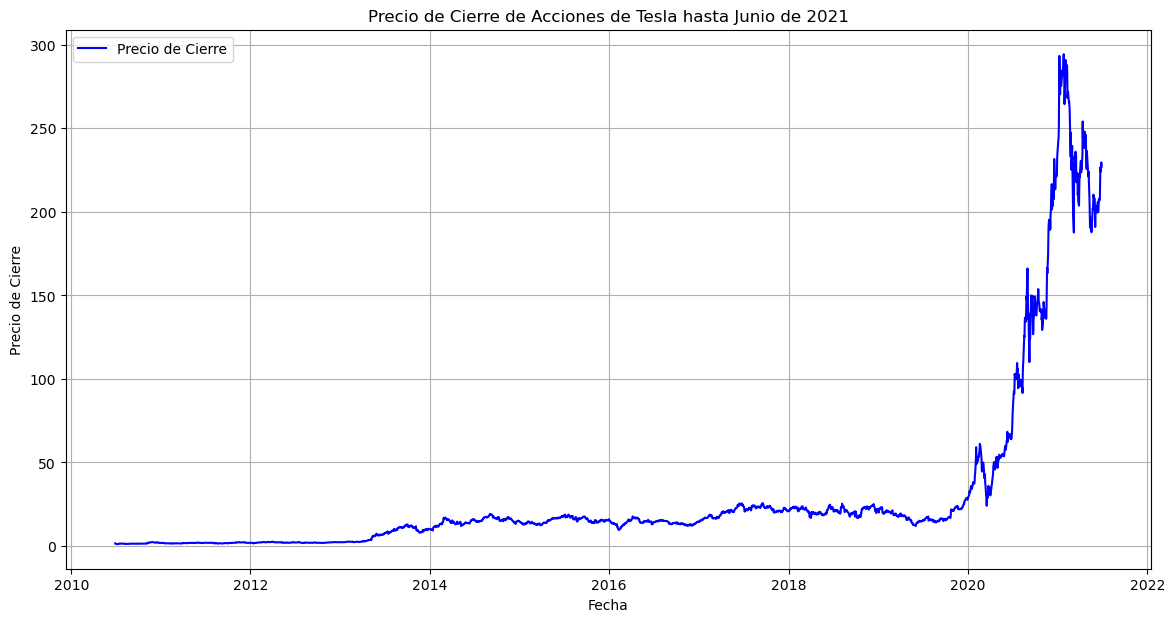

In [38]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(data, title):
    # Configuración del gráfico
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Precio de Cierre', color='blue')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Crear un objeto Ticker para Tesla
tesla = yf.Ticker("TSLA")

# Intentar obtener el historial de precios
try:
    tesla_data = tesla.history(start="2010-01-01", end="2021-06-30")
    
    if tesla_data.empty:
        raise ValueError("No data found for Tesla. The symbol may be incorrect or the data might not be available.")
    
    # Usar la función make_graph para graficar los datos
    make_graph(tesla_data, 'Precio de Cierre de Acciones de Tesla hasta Junio de 2021')
    
except Exception as e:
    print(f"Error: {e}")


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.

Utilice la función `make_graph` para graficar los datos de acciones de GameStop y también proporcione un título para el gráfico. La estructura para llamar a la función `make_graph` es `make_graph(gme_data, gme_revenue, 'GameStop')`. Tenga en cuenta que el gráfico solo mostrará datos hasta junio de 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


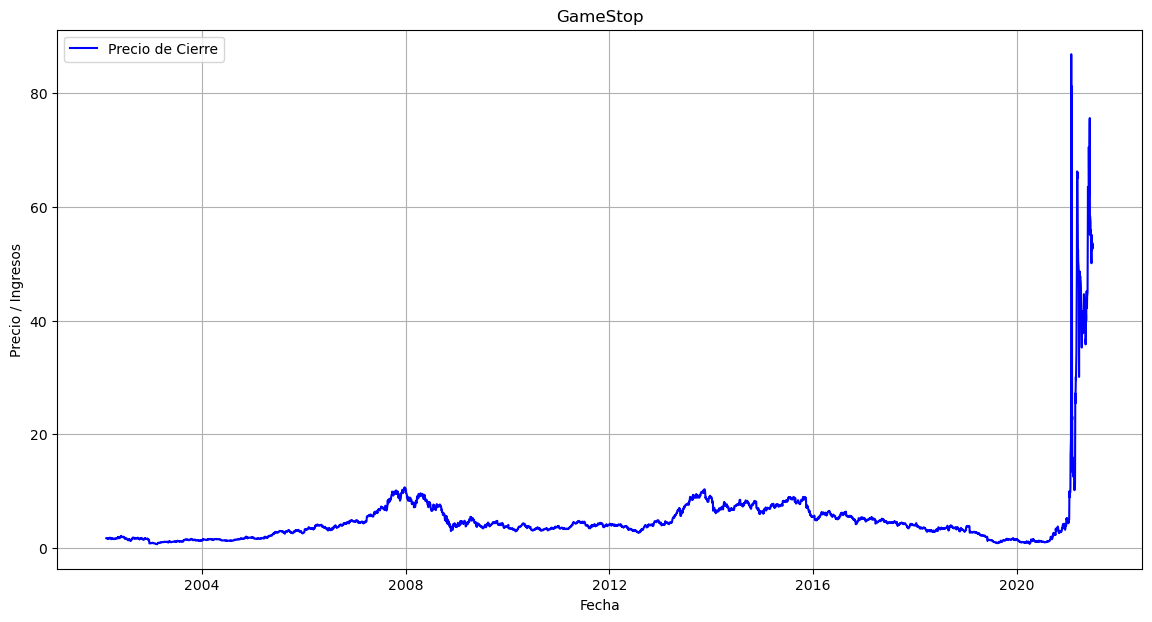

In [40]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(price_data, revenue_data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(price_data.index, price_data['Close'], label='Precio de Cierre', color='blue')
    
    if revenue_data is not None and not revenue_data.empty:
        plt.plot(revenue_data['Fecha'], revenue_data['Ingresos'], label='Ingresos', color='green', linestyle='--')
    
    plt.xlabel('Fecha')
    plt.ylabel('Precio / Ingresos')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Descargar los datos de GameStop
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data = gme_data[:'2021-06-30']  # Filtrar hasta el 30 de junio de 2021

# Supongamos que tienes los datos de ingresos en un DataFrame llamado `gme_revenue`
# Si no tienes datos de ingresos, puedes asignar `None` a `gme_revenue`
gme_revenue = None  # Reemplaza esto con tus datos de ingresos reales si los tienes

# Llamar a la función make_graph
make_graph(gme_data, gme_revenue, 'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```toggle ## Change Log
```
```toggle | Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
```
```toggle | ----------------- | ------- | ------------- | ------------------------- |
```
```toggle | 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
```
```toggle | 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
```
```toggle | 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |
```
